# <center>Vehicle Claims Prediction</center> 
## Modelling project
Hypothetical futuristic situation.
___

This is a hypothetical situation where I work for an insurance company. My task is to predict insurance claims based on existing data and note that there are no additional resources to corroborate predictions.
___

Usually I would model the data by a **probabilistic model**. I would split the data into 3 sets:
* Training Data: used to train model parameters.
* Validation Data: used to determine what model hyperparameters to adjust.
* Test Data: used to get some final performance metric.

However, the given data consists of information regarding only 10 vehicles and the splitting does not become obvious. We run the risk of using very important features needed for the modelling in the validation or test data and therefore making the model less robust.

For this specific task, the splitting is not recommended and my suggestion is to use all of the given data to train the model and to use a **deterministic model** for the validation step.
___

## The jupyter notebook has following sections:
___
1. [Objective](#1.-Objective)
2. [Import modules for EDA](#2.-Import-modules)
3. [Data](#2.-Data)
4. [Data processing](#3.-Data-processing)
    * 4.1 [Data Exploration](#4.1-Data-Exploration)
    * 4.2 [Data Transformation](#4.2-Data-Transformation)
    * 4.3 [Data Statistics](#4.3-Data-Statistics)
    * 4.4 [Data Visualization](#4.4-Data-Visualization)
    * 4.5 [DETERMINISTIC MODEL](#4.5-DETERMINISTIC-MODEL)
    * 4.6 [Assumptions](#4.6-Assumptions)
    * 4.7 [INITIAL PREDICTION BASED ON EDA](#4.7-Initial-prediction-based-on-EDA-and-the-deterministic-model)
    * 4.8 [Remove the outliers and create labels and features](#4.8-Remove-the-outliers-and-create-labels-and-features)
5. [Lasso Regression with Python (Probabilistic model)](#5.-Lasso-Regression-with-Python:)
6. [KNN (Probabilistic model)](#6.-Additional-trials)

## 1. Objective

<center><FONT COLOR="#ff0000">Pricing game</FONT></center>

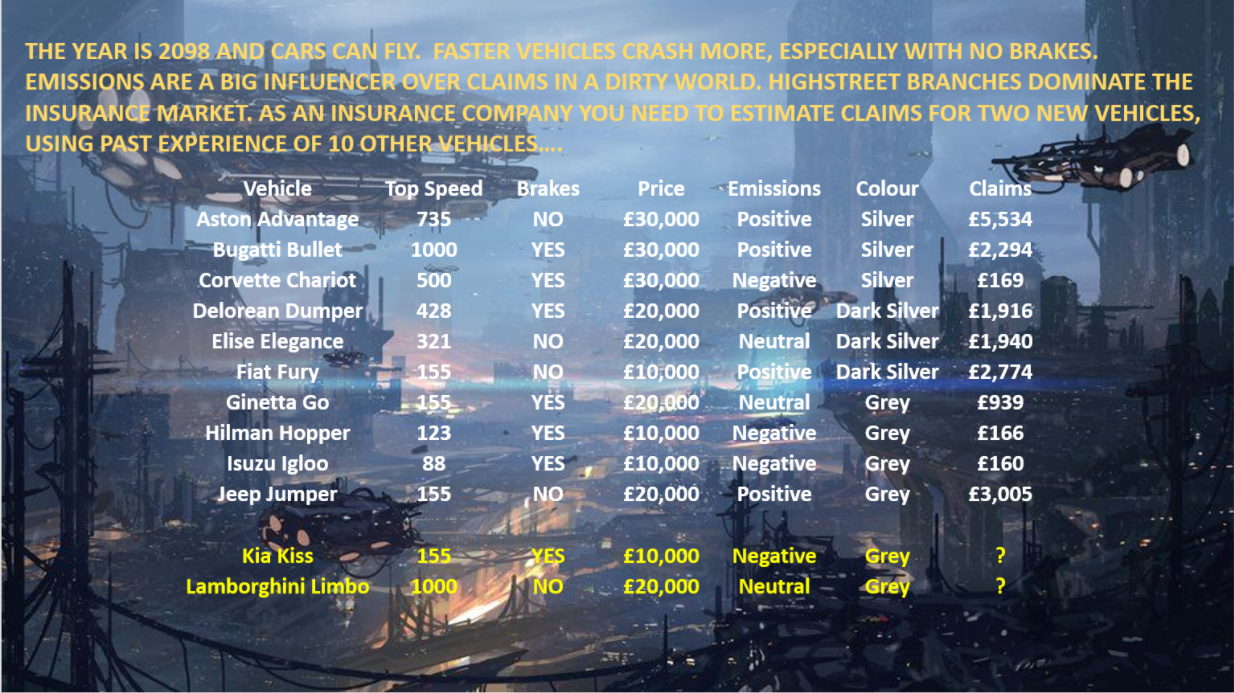

___
[Click to go back to top](#Car-Claims-Prediction:)
___

## 2. Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

___
[Click to go back to top](#Car-Claims-Prediction:)
___

## 3. Data

In [2]:
# With the given data predict the 'claims' amount
mydata = {
    'Vehicle':['Aston Advantage',
              'Bugatti Bullet',
              'Corvette Charlot',
              'Delorean Dumper',
              'Elise Elegance',
              'Fiat Fury',
              'Ginetta Go',
              'Hilman Hopper',
              'Isuzu Igloo',
              'Jeep Jumper'],
    'Top speed':[735,1000,500,428,321,155,155,123,88,155],
    'Brakes': ['NO','YES','YES','YES','NO','NO','YES','YES','YES','NO'],
    'Price': ['£30,000','£30,000','£30,000','£20,000','£20,000','£10,000','£20,000','£10,000','£10,000','£20,000'],
    'Emissions': ['Positive','Positive','Negative','Positive','Neutral','Positive','Neutral','Negative','Negative','Positive'],
    'Colour': ['Silver','Silver','Silver','Dark Silver','Dark Silver','Dark Silver','Grey','Grey','Grey','Grey'],
    'Claims': ['£5,534','£2,294','£169','£1,916','£1,940','£2,774','£939','£166','£160','£3,005']
}
mypredictdata = {'Vehicle':['Kia Kiss',
                           'Lamborghini Limbo'],
                'Top speed':[155,1000],
                'Brakes': ['YES','NO'],
                'Price': ['£10,000','£20,000'],
                'Emissions': ['Negative','Neutral'],
                'Colour': ['Grey','Grey']}
given_data = pd.DataFrame(mydata)
data_to_predict = pd.DataFrame(mypredictdata)

In [3]:
given_data

,Vehicle,Top speed,Brakes,Price,Emissions,Colour,Claims
0,Aston Advantage,735,NO,"£30,000",Positive,Silver,"£5,534"
1,Bugatti Bullet,1000,YES,"£30,000",Positive,Silver,"£2,294"
2,Corvette Charlot,500,YES,"£30,000",Negative,Silver,£169
3,Delorean Dumper,428,YES,"£20,000",Positive,Dark Silver,"£1,916"
4,Elise Elegance,321,NO,"£20,000",Neutral,Dark Silver,"£1,940"
5,Fiat Fury,155,NO,"£10,000",Positive,Dark Silver,"£2,774"
6,Ginetta Go,155,YES,"£20,000",Neutral,Grey,£939
7,Hilman Hopper,123,YES,"£10,000",Negative,Grey,£166
8,Isuzu Igloo,88,YES,"£10,000",Negative,Grey,£160
9,Jeep Jumper,155,NO,"£20,000",Positive,Grey,"£3,005"


In [4]:
data_to_predict

,Vehicle,Top speed,Brakes,Price,Emissions,Colour
0,Kia Kiss,155,YES,"£10,000",Negative,Grey
1,Lamborghini Limbo,1000,NO,"£20,000",Neutral,Grey


___
[Click to go back to top](#Car-Claims-Prediction:)
___

## 4. Data processing
**EDA (Exploratory Data Analysis) & Feature Engineering**

Let's first have a look at the dataset and understand the size, attribute names etc.

*This data set is small enough to perform this step visually, however let's pretend it is not, so we can understand how to deal with larger data.*

In [5]:
# Make a copy of the given_data data
df = given_data.copy()
dfp = data_to_predict.copy()

### 4.1 Data Exploration

In [6]:
df.head()

,Vehicle,Top speed,Brakes,Price,Emissions,Colour,Claims
0,Aston Advantage,735,NO,"£30,000",Positive,Silver,"£5,534"
1,Bugatti Bullet,1000,YES,"£30,000",Positive,Silver,"£2,294"
2,Corvette Charlot,500,YES,"£30,000",Negative,Silver,£169
3,Delorean Dumper,428,YES,"£20,000",Positive,Dark Silver,"£1,916"
4,Elise Elegance,321,NO,"£20,000",Neutral,Dark Silver,"£1,940"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Vehicle    10 non-null     object
 1   Top speed  10 non-null     int64 
 2   Brakes     10 non-null     object
 3   Price      10 non-null     object
 4   Emissions  10 non-null     object
 5   Colour     10 non-null     object
 6   Claims     10 non-null     object
dtypes: int64(1), object(6)
memory usage: 688.0+ bytes


In [8]:
# Check if vehicles are unique in the given data
df.Vehicle.nunique() == df.shape[0]

True

In [9]:
# Check if the vehicles to predict are in the given data
list(dfp.Vehicle.value_counts().index) in list(df.Vehicle.value_counts().index)

False

**Observations:**

The vehicles are unique, that is they do not repeat.

### 4.2 Data Transformation
**Missing values**

Note that there are no missing values, and the data is small enough to do this step visually, but in general it is good practice to check for these. If there were missing values we could:
- Drop them
- Replace them with zeros, mean values of its corresponding columns, ...

In [10]:
print(df.isnull().sum())

Vehicle      0
Top speed    0
Brakes       0
Price        0
Emissions    0
Colour       0
Claims       0
dtype: int64


In [11]:
print(dfp.isnull().sum())

Vehicle      0
Top speed    0
Brakes       0
Price        0
Emissions    0
Colour       0
dtype: int64


**Transform data types**

In [12]:
# DEFINE FUNCTIONS HERE
def price_to_numeric(df_series):
    return df_series.replace({'\£':'',',':''}, regex = True).astype(float)

In [13]:
# Convert to numeric
df['Price'] = price_to_numeric(given_data['Price'])
dfp['Price'] = price_to_numeric(data_to_predict['Price'])
df['Claims'] = price_to_numeric(given_data['Claims'])

In [14]:
# Convert to categories
df['Brakes'] = df['Brakes'].astype('category')
df['Emissions'] = df['Emissions'].astype('category')
df['Colour'] = df['Colour'].astype('category')
dfp['Brakes'] = dfp['Brakes'].astype('category')
dfp['Emissions'] = dfp['Emissions'].astype('category')
dfp['Colour'] = dfp['Colour'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Vehicle    10 non-null     object  
 1   Top speed  10 non-null     int64   
 2   Brakes     10 non-null     category
 3   Price      10 non-null     float64 
 4   Emissions  10 non-null     category
 5   Colour     10 non-null     category
 6   Claims     10 non-null     float64 
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 866.0+ bytes


### 4.3 Data Statistics

In [16]:
df.describe(include='all')

,Vehicle,Top speed,Brakes,Price,Emissions,Colour,Claims
count,10,10.000000,10,10.000000,10,10,10.000000
unique,10,NaN,2,NaN,3,3,NaN
top,Aston Advantage,NaN,YES,NaN,Positive,Grey,NaN
freq,1,NaN,6,NaN,5,4,NaN
mean,NaN,366.000000,NaN,20000.000000,NaN,NaN,1889.700000
std,NaN,304.017178,NaN,8164.965809,NaN,NaN,1676.674158
min,NaN,88.000000,NaN,10000.000000,NaN,NaN,160.000000
25%,NaN,155.000000,NaN,12500.000000,NaN,NaN,361.500000
50%,NaN,238.000000,NaN,20000.000000,NaN,NaN,1928.000000
75%,NaN,482.000000,NaN,27500.000000,NaN,NaN,2654.000000


**Observations:**

Notice the 'Claims' have a high standard deviation. We can reduce this by removing outliers if applicable.

### 4.4 Data Visualization
It's time to visualize our data to find out something new about chosen features. We want to see:
- correllation heat-map.
- the distribution of our target,
- interactions between single features and the target,

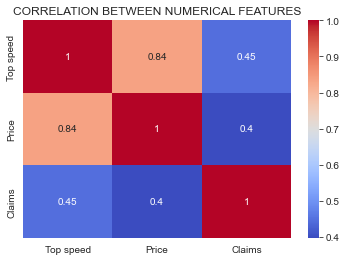

In [17]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('CORRELATION BETWEEN NUMERICAL FEATURES')
plt.show()

**Observations:**

Price and Top speed are highly correlated features. Therefore, when testing the model, if we have high variance in the solutions, consider removing one of these to avoid multicolinearity issues. 

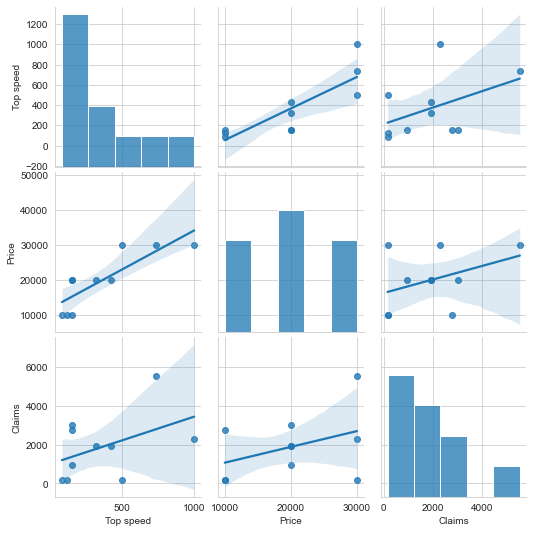

In [18]:
sns.pairplot(df,kind='reg')
#plt.title('DISTRIBUTION AND SCATTER PLOTS FOR NUMERICAL FEATURES')
plt.show()

**Observations:**

Notice the outlier in the 'Claims'. This is the cause for the high standard deviation.

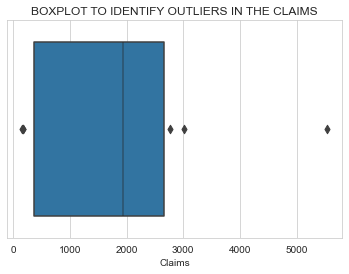

In [19]:
# CHECK FOR OUTLIERS
sns.boxenplot(data=df, x='Claims')
plt.title('BOXPLOT TO IDENTIFY OUTLIERS IN THE CLAIMS')
plt.show()

In [20]:
# Information about this outlier
df[df['Claims']>4000]

,Vehicle,Top speed,Brakes,Price,Emissions,Colour,Claims
0,Aston Advantage,735,NO,30000.0,Positive,Silver,5534.0


**Observations:**

The outlier in the claims is not distributed in the same fashion as the rest of the data and using this value in the model will have a detrimental effect in the variance of the model.

**Check the effect of 'Brakes' and 'Emissions'**

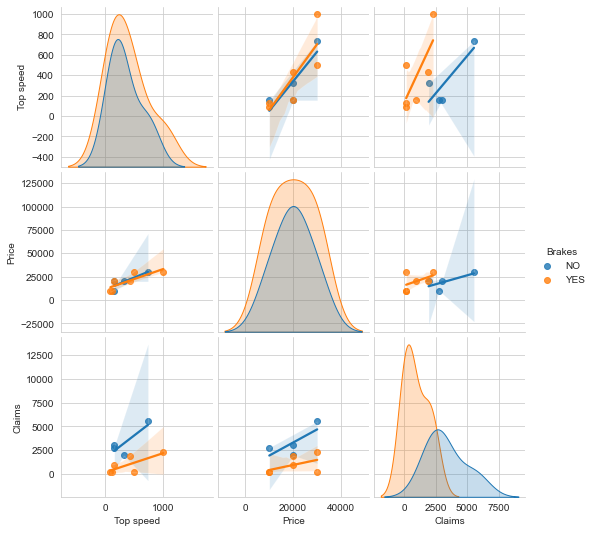

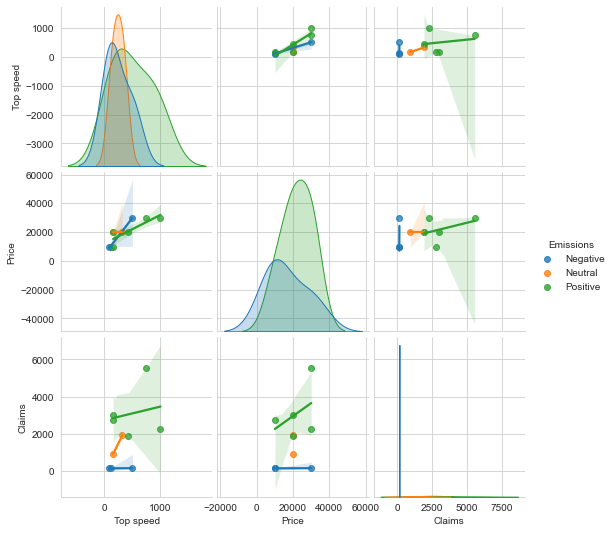

In [21]:
sns.pairplot(df,kind='reg',hue='Brakes')
sns.pairplot(df,kind='reg',hue='Emissions')
plt.show()

**Observations:**

These graphs corroborate the statement in the description of the game:

* Faster vehicles crash more
* Especially with no brakes
* Emissions are a big influencer over claims and the order of importance is as follows:
    - Positive
    - Neutral
    - Negative

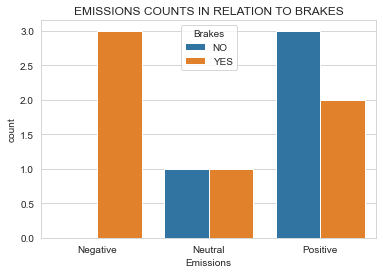

In [22]:
sns.countplot(data=df, x='Emissions',hue='Brakes')
plt.title('EMISSIONS COUNTS IN RELATION TO BRAKES')
plt.show()

**Observations:**

All negative emissions have brakes. We will assume this is normal for the entire population.

### 4.5 DETERMINISTIC MODEL
A deterministic model can be thought of as a probabilitic model that has a likelihood of being 100% true. In this section, We simply use a Pivot Table and the information gathered from the graphs to determine a possible range of claims. 

We have identified the following from the graphs:
* Higher top speed => Higher claim
* Brakes No claims > Brakes Yes claims
* Emissions => Positive claims > Neutral claims > Negative claims

In [23]:
df.groupby('Brakes').mean()['Claims']

Brakes
NO     3313.250000
YES     940.666667
Name: Claims, dtype: float64

In [24]:
df.groupby('Emissions').mean()['Claims']

Emissions
Negative     165.0
Neutral     1439.5
Positive    3104.6
Name: Claims, dtype: float64

In [25]:
df.groupby('Price').mean()['Claims']

Price
10000.0    1033.333333
20000.0    1950.000000
30000.0    2665.666667
Name: Claims, dtype: float64

In [26]:
df.groupby(['Brakes','Emissions','Price','Colour']).agg(['mean','min','max']).dropna(thresh=1)

Top speed                  Claims  \
                                          mean     min     max    mean   
Brakes Emissions Price   Colour                                          
NO     Neutral   20000.0 Dark Silver     321.0   321.0   321.0  1940.0   
       Positive  10000.0 Dark Silver     155.0   155.0   155.0  2774.0   
                 20000.0 Grey            155.0   155.0   155.0  3005.0   
                 30000.0 Silver          735.0   735.0   735.0  5534.0   
YES    Negative  10000.0 Grey            105.5    88.0   123.0   163.0   
                 30000.0 Silver          500.0   500.0   500.0   169.0   
       Neutral   20000.0 Grey            155.0   155.0   155.0   939.0   
       Positive  20000.0 Dark Silver     428.0   428.0   428.0  1916.0   
                 30000.0 Silver         1000.0  1000.0  1000.0  2294.0   

                                                      
                                         min     max  
Brakes Emissions Price   Colour                       
NO     Neutral   20000.0 Dark Silver  1940.0  1940.0  
       Positive  10000.0 Dark Silver  2774.0  2774.0  
                 20000.0 Grey         3005.0  3005.0  
                 30000.0 Silver       5534.0  5534.0  
YES    Negative  10000.0 Grey          160.0   166.0  
                 30000.0 Silver        169.0   169.0  
       Neutral   20000.0 Grey          939.0   939.0  
       Positive  20000.0 Dark Silver  1916.0  1916.0  
                 30000.0 Silver       2294.0  2294.0

##### Analysing the Pivot Table in conjuction with the provided data:
**Kia Kiss:**
* The 5th row:
    - Brakes: Same
    - Emissions: Same
    - Price: Same
    - <FONT COLOR="#ff0000">Top speed: 123 (lower than 155)</FONT>
    - Vehicle: Hilman Hopper
    - Claims: £166
    - **<FONT COLOR="#ff0000">Observation: Less speed indicates lower claim than Kia Kiss</FONT>**
    
$$ Claims(Hilman \, Hopper) = £166 < Claims(Kias \, Kiss)$$

* The 7th row:
    - Top speed: Same
    - Brakes: Same
    - <FONT COLOR="#ff0000">Emissions: Neutral (Negative for Kia Kiss)</FONT>
    - <FONT COLOR="#ff0000">Price: £20,000 (£10,000 for Kia Kiss)</FONT>
    - Vehicle: Ginetta Go
    - Colour: Same
    - Claims: £939
    - **<FONT COLOR="#ff0000">Observation: Neutral emissions in comparison to Negative and higher price indicate higher claim than Kia Kiss</FONT>**
    
 $$ Claims(Hilman \, Hopper) = £166 < Claims(Kias \, Kiss) < Claims(Ginetta \, Go) = £939 $$

**Lamborghini Limbo:**
* The 1st row:
    - Brakes: Same
    - Emissions: Same
    - Price: Same
    - <FONT COLOR="#ff0000">Colour: Dark Silver (Grey for Lamborghini Limbo)</FONT>
    - <FONT COLOR="#ff0000">Top speed: 321 (1000 for Lamborghini Limbo)</FONT>
    - Vehicle: Elise Elegance
    - Claims: £1,940
    - **<FONT COLOR="#ff0000">Observation: We assume that the <u>colour is irrelevant</u>. Less speed indicates lower claim than Lamborghini Limbo</FONT>**
    
 $$ Claims(Elise \, Elegance) = £1,940 < Claims(Lamborghini \, Limbo)$$
 
* The last row:
    - Top speed: Same
    - <FONT COLOR="#ff0000">Brakes: YES (NO for Lamborghini Limbo)</FONT>
    - <FONT COLOR="#ff0000">Emissions: Positive (Neutral for Lamborghini Limbo)</FONT>
    - <FONT COLOR="#ff0000">Price: £30,000 (£20,000 for Lamborghini Limbo)</FONT>
    - Vehicle: Bugatti Bullet
    - <FONT COLOR="#ff0000">Colour: Silver (Grey for Lamborghini Limbo)</FONT>
    - Claims: £939
    - **<FONT COLOR="#ff0000">Observation: We assume that the <u>colour is irrelevant</u>. Positive emissions in comparison to Neutral and higher price indicate higher claim than Lamborghini Limbo, however, the Brakes = YES in comparison to Brakes = NO brings the claims down. </FONT>**
    
 $$ Claims(Elise \, Elegance) = £1,940 < Claims(Lamborghini \, Limbo) < Claims(Bugatti \, Bullet) = £2,294 ????$$

At this stage, we cannot say with certainty that the maximum claims value is appropriate for the Lamborghini Limbo. We need more information. The data for Jeep Jumper indicates a value of £3,005 for the claims, but its top speed is only about a 10th, so is the following a more suited range?

$$ Claims(Elise \, Elegance) = £1,940 < Claims(Lamborghini \, Limbo) \lesssim £3,005 ???$$

**We will rely on statistics to determine how each feature is relevant.**

___
[Click to go back to top](#Car-Claims-Prediction:)
___

In [27]:
#### $$ Claims(Hilman \, Hopper) = £166 < Claims(Kias \, Kiss) < Claims(Ginetta \, Go) = £939 $$
#### $$ Claims(Elise \, Elegance) = £1,940 < Claims(Lamborghini \, Limbo) < Claims(Bugatti \, Bullet) = £2,294 $$

### 4.6 Assumptions:
* The sample data is representative of the general population. Even the fact that all Vehicles with negative emissions have brakes. 
* The colour is an irrelevant variable/feature for the claim. Without this assumption our deterministic model will only be applicable to the Kia Kiss and not the Lamborghini Limbo.
* The claim with over £4,000 is an outlier and will induce a higher variation in the model and note that **homoscedasticity** (normal distribution) of the residuals is an essential assumption for a linear regression model. If the residuals are not not normal then there may be problem with the ***model fit, stability and reliability***.
* The relationship between X and the mean of Y is linear.
* The vehicles appear only once in the data, therefore we will also ignore the column 'Vehicle'.

___
[Click to go back to top](#Car-Claims-Prediction:)
___

### 4.7 Initial prediction based on EDA and the deterministic model

The features we will use for the predicion are 'Top speed', 'Brakes' and 'Emissions'. Therefore, based on the exploratory data analysis alone, we can come up with an initial prediction:
#### $$ Claims(Hilman \, Hopper) = £166 < Claims(Kias \, Kiss) < Claims(Ginetta \, Go) = £939 $$
#### $$ Claims(Elise \, Elegance) = £1,940 < Claims(Lamborghini \, Limbo) \lesssim Claims(Jeep \, Jumper) = £3,005 $$



This initial prediction confirms that for this particular prediction we can remove the outlier represented by the vehicle Aston Advantage. Also notice that taking into consideration only the features mentioned above, the data for Jeep Jumper and Fiat Fury are identical and we can safely remove the one with higher Claims value of £3,005 to avoid colinearity issues.

___
[Click to go back to top](#Car-Claims-Prediction:)
___

### 4.8 Remove the outliers and create labels and features

**Remove outlier**

In [28]:
# FIRST REMOVE THE OUTLIER
df = df[df['Claims'] < 4000]

**Create labels and features**

We need to encode our categorical features as one-hot numeric features (dummy variables):

In [29]:
dummies = pd.get_dummies(df[['Brakes', 'Emissions']])
dummiesp = pd.get_dummies(dfp[['Brakes', 'Emissions']])

In [30]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Brakes_NO           9 non-null      uint8
 1   Brakes_YES          9 non-null      uint8
 2   Emissions_Negative  9 non-null      uint8
 3   Emissions_Neutral   9 non-null      uint8
 4   Emissions_Positive  9 non-null      uint8
dtypes: uint8(5)
memory usage: 117.0 bytes


In [31]:
dummiesp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Brakes_NO           2 non-null      uint8
 1   Brakes_YES          2 non-null      uint8
 2   Emissions_Negative  2 non-null      uint8
 3   Emissions_Neutral   2 non-null      uint8
dtypes: uint8(4)
memory usage: 136.0 bytes


**Notice that the data to predict does not contain the column 'Emissions_Positive', so we add it as zero values for consistency.**

In [32]:
dummiesp['Emissions_Positive'] = 0
dummiesp = dummiesp[list(dummies.columns)]

Next, we create our label y:

In [33]:
y = df['Claims']

We make a list of all numerical features (we need them later):

In [34]:
list_numerical = ['Top speed','Price']
#list_numerical = ['Top speed']
X_numerical = df[list_numerical]
Xp_numerical = dfp[list_numerical]

In [35]:
X = pd.concat([X_numerical,dummies], axis=1)
Xp = pd.concat([Xp_numerical,dummiesp], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 1 to 9
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Top speed           9 non-null      int64  
 1   Price               9 non-null      float64
 2   Brakes_NO           9 non-null      uint8  
 3   Brakes_YES          9 non-null      uint8  
 4   Emissions_Negative  9 non-null      uint8  
 5   Emissions_Neutral   9 non-null      uint8  
 6   Emissions_Positive  9 non-null      uint8  
dtypes: float64(1), int64(1), uint8(5)
memory usage: 261.0 bytes


In [36]:
# Check the dependent variables
X

,Top speed,Price,Brakes_NO,Brakes_YES,Emissions_Negative,Emissions_Neutral,Emissions_Positive
1,1000,30000.0,0,1,0,0,1
2,500,30000.0,0,1,1,0,0
3,428,20000.0,0,1,0,0,1
4,321,20000.0,1,0,0,1,0
5,155,10000.0,1,0,0,0,1
6,155,20000.0,0,1,0,1,0
7,123,10000.0,0,1,1,0,0
8,88,10000.0,0,1,1,0,0
9,155,20000.0,1,0,0,0,1


___
[Click to go back to top](#Car-Claims-Prediction:)
___

## 5. Lasso Regression with Python:
* 5.1 [Basics](#5.1-Basics)
* 5.2 [Data processing step](#Data-processing-step)
    * 5.2.1 Split data
    * 5.2.2 Standardization
* 5.3 [Lasso regression](#5.3-Lasso-regression)
    * 5.3.1 Model evaluation
* 5.4 [Role of alpha](#5.4-Role-of-alpha)
* 5.5 [Lasso with optimal alpha](#5.5-Lasso-with-optimal-alpha)
    * 5.5.1 k-fold cross validation
    * 5.5.2 Best model
    * 5.5.3 Model evaluation
* 5.6 [Prediction](#5.6-Prediction)

### 5.1 Basics
This algorithm is mainly based on the excellent book “An Introduction to Statistical Learning” from James et al. (2021), the scikit-learn documentation about regressors with variable selection as well as Python code provided by [Jan Kierenz](https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/#import).

Lasso regression relies upon the linear regression model but additionaly performs a so called L1 regularization, which is a process of introducing additional information in order to prevent overfitting. As a consequence, we can fit a model containing all possible predictors and use lasso to perform variable selection by using a technique that regularizes the coefficient estimates (it shrinks the coefficient estimates towards zero). In particular, the minimization objective does not only include the residual sum of squares (RSS) - like in the OLS regression setting - but also the sum of the absolute value of coefficients.

The residual sum of squares (RSS) is calculated as follows:
## $$RSS = \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
In the lasso regression, the minimization objective becomes:
## $$RSS + \alpha \sum_{j=1}^{p} | \beta_j |$$
   - *n* represents the number of observations.
   - *p* denotes the number of variables that are available in the dataset.
   - α (alpha) can take various values:
       * α = 0: Same coefficients as least squares linear regression
       * α = ∞: All coefficients are zero
       * 0 < α < ∞: coefficients are between 0 and that of least squares linear regression
Lasso regression’s advantage over least squares linear regression is rooted in the bias-variance trade-off. As α increases, the flexibility of the lasso regression fit decreases, leading to decreased variance but increased bias. This procedure is more restrictive in estimating the coefficients and - depending on your value of α - may set a number of them to exactly zero. This means in the final model the response variable will only be related to a small subset of the predictors—namely, those with nonzero coeffcient estimates. Therefore, selecting a good value of α is critical.

___
[Click to go back to top](#Car-Claims-Prediction:)

[Click to go back to top of section](#5.-Lasso-Regression-with-Python:)
___

### 5.2 Data processing step

#### 5.2.1 Split data
Usually, we would split the data set into train and test set with the first 70% of the data for training and the remaining 30% for testing.

In [37]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

#### 5.2.2 Standardization
Lasso performs best when all numerical features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected. ***Note that this is another reason to remove the outlier.***

This means it is important to standardize our features. We do this by subtracting the mean from our observations and then dividing the difference by the standard deviation. This so called standard score 
z
 for an observation 
x
 is calculated as:
 $$ z = \frac{(x-\hat{x})}{s}$$
 where:

* *x* is an observation in a feature
* *x* with the hat is the mean of that feature
* *s* is the standard deviation of that feature.

*To avoid data leakage, the standardization of numerical features should always be performed after data splitting and only from training data. Furthermore, we obtain all necessary statistics for our features (mean and standard deviation) from training data and also use them on test data. Note that we don’t standardize our dummy variables (which only have values of 0 or 1).*



In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X[list_numerical]) 

X.loc[:,list_numerical] = scaler.transform(X[list_numerical])

#X_test.loc[:,list_numerical] = scaler.transform(X_test[list_numerical])

Xp.loc[:,list_numerical] = scaler.transform(Xp[list_numerical])

In [39]:
# Check that the values have been scaled
X

,Top speed,Price,Brakes_NO,Brakes_YES,Emissions_Negative,Emissions_Neutral,Emissions_Positive
1,2.454684,1.507557,0,1,0,0,1
2,0.636400,1.507557,0,1,1,0,0
3,0.374567,0.150756,0,1,0,0,1
4,-0.014546,0.150756,1,0,0,1,0
5,-0.618217,-1.206045,1,0,0,0,1
6,-0.618217,0.150756,0,1,0,1,0
7,-0.734587,-1.206045,0,1,1,0,0
8,-0.861867,-1.206045,0,1,1,0,0
9,-0.618217,0.150756,1,0,0,0,1


___
[Click to go back to top](#Car-Claims-Prediction:)

[Click to go back to top of section](#5.-Lasso-Regression-with-Python:)
___

### 5.3 Lasso regression
First, we apply lasso regression on the training set with an arbitrarily regularization parameter 
α of 1.

In [40]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X, y)

Lasso(alpha=1)

#### 5.3.1 Model evaluation

We print the R2-score for the training and test set.

In [41]:
print('R squared training set', round(reg.score(X, y)*100, 2))
#print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 99.48


RMSE for the training and test set.

In [42]:
from sklearn.metrics import mean_squared_error

# Training data
pred_train = reg.predict(X)
mse_train = mean_squared_error(y, pred_train)
print('RMSE training set', round(np.sqrt(mse_train), 2))

# Test data
#pred = reg.predict(X_test)
#mse_test =mean_squared_error(y_test, pred)
#print('RMSE test set', round(np.sqrt(mse_test), 2))

RMSE training set 77.86


### 5.4 Role of alpha

To better understand the role of alpha, we plot the lasso coefficients as a function of alpha (max_iter are the maximum number of iterations):

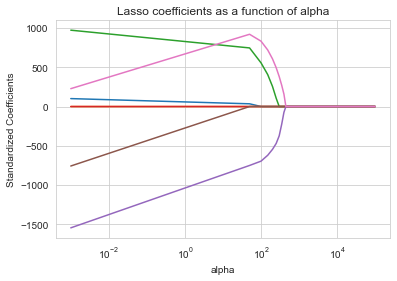

In [43]:
import numpy as np
import matplotlib.pyplot as plt

#alphas = np.linspace(0.01,500,100)
alphas = np.linspace(1e-3,1e5,2000)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');


Remember that if alpha = 0, then the lasso gives the least squares fit, and when alpha becomes very large, the lasso gives the null model in which all coefficient estimates equal zero.

Moving from left to right in our plot, we observe that at first the lasso models contains many predictors with high magnitudes of coefficient estimates. With increasing alpha, the coefficient estimates approximate towards zero.

Next, we use cross-validation to find the best value for alpha.

___
[Click to go back to top](#Car-Claims-Prediction:)

[Click to go back to top of section](#5.-Lasso-Regression-with-Python:)
___

### 5.5 Lasso with optimal alpha

To find the optimal value of alpha, we use scikit learns lasso linear model with iterative fitting along a regularization path (LassoCV). The best model is selected by cross-validation.

#### 5.5.1 k-fold cross validation

In [44]:
from sklearn.linear_model import LassoCV

# Lasso with 6 fold cross-validation
model = LassoCV(cv=6, random_state=0, max_iter=1e5)

# Fit model
model.fit(X, y)

LassoCV(cv=6, max_iter=100000.0, random_state=0)

Show best value of penalization chosen by cross validation:

In [45]:
model.alpha_

14.735066967621027

#### 5.5.2 Best model
Use best value for our final model:

In [46]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X, y)

Lasso(alpha=14.735066967621027)

Show model coefficients and names:

In [47]:
#print(list(zip(lasso_best.coef_, X)))
coefficients = pd.DataFrame(list(zip(X,lasso_best.coef_)))
coefficients.rename(columns={0: 'Features', 1: 'Coefficients'}, inplace=True)
coefficients

,Features,Coefficients
0,Top speed,81.137527
1,Price,0.000000
2,Brakes_NO,906.129650
3,Brakes_YES,-0.000000
4,Emissions_Negative,-776.834429
5,Emissions_Neutral,0.000000
6,Emissions_Positive,966.676658


In [48]:
#coef = coefficients[coefficients['Coefficients'] != 0]
#coef['Temporary Variable Names'] = ['t','b','n','p']
#coef['Coefficients'] = coef['Coefficients'].apply(lambda i: np.round(i,0))
#coef

**Observations:**

The varibles with 0 coefficients bring no additional information.

* Using both the Price and Top speed would cause colinearity issues (refer to singular matrix). As explained above that the Top speed and the Price are highly correlated values.
* The Brakes_YES and Emmissions_Neutral brings no additional information because when transforming a categorical feature into dummy variables one of them bring no additional information.
* The coefficients follow the pattern predicted on EDA.

#### 5.5.3 Model evaluation

**Have we chosen the right value of alpha?**
Lasso path: plot results of cross-validation with mean squared erros 

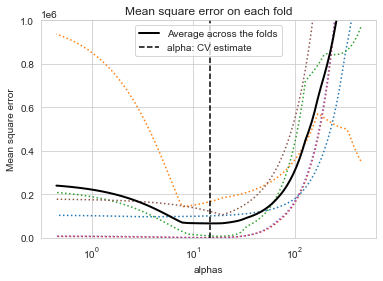

In [49]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

#ymin, ymax = 5e4, 25e4
ymin, ymax = 0, 1e6
plt.ylim(ymin, ymax);

**Statistics about the model:***

In [50]:
#print('R squared training set', lasso_best.score(X, y))
print('R squared training set', round(lasso_best.score(X, y)*100, 2))
#print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))
print('RMSE: ',np.sqrt(mean_squared_error(y, lasso_best.predict(X))))

R squared training set 99.34
RMSE:  88.12960202567355


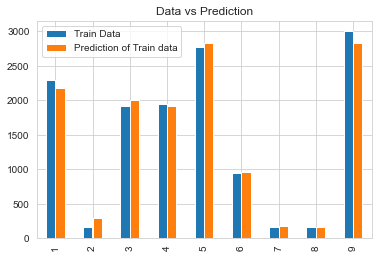

In [51]:
df_pred = pd.DataFrame({'Train Data':y,'Prediction of Train data':lasso_best.predict(X)})
df_pred.plot(kind='bar')
plt.title('Data vs Prediction')
plt.show()

**Why is it important for residuals to be normally distributed?**
The basic assumption of regression model is normality of residuals. If your residuals are not not normal then there may be problem with the model fit, stability and reliability.

C:\Users\asadmehasi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


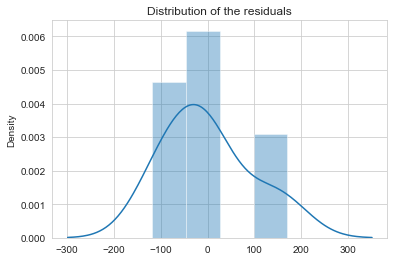

In [52]:
sns.distplot(df_pred.iloc[:,0] - df_pred.iloc[:,1])
plt.title('Distribution of the residuals')
plt.show()

In [53]:
#pd.DataFrame({'Test Data':y_test,'Prediction of Test data':lasso_best.predict(X_test)}).plot(kind='bar')

In [54]:
#print('RMSE: ',np.sqrt(mean_squared_error(y_test, lasso_best.predict(X_test))))

### 5.6 Prediction

In [55]:
#lasso_best.predict(Xp)
dfp.join(pd.DataFrame({'Claims Predictions':np.round(lasso_best.predict(Xp),0)}))

,Vehicle,Top speed,Brakes,Price,Emissions,Colour,Claims Predictions
0,Kia Kiss,155,YES,10000.0,Negative,Grey,185.0
1,Lamborghini Limbo,1000,NO,20000.0,Neutral,Grey,2117.0


___
[Click to go back to top](#Car-Claims-Prediction:)

[Click to go back to top of section](#5.-Lasso-Regression-with-Python:)
___

## 6. Additional trials

### KNN for regression
Note that this model is shown for illustration purposes only. 

We would need to evaluate the most appropriate *n* value and would require to remove redundant features (like Price and dummy varibles) to make this model adequate.

In [56]:
from sklearn import neighbors
#knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

<AxesSubplot:>

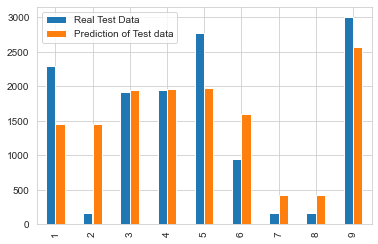

In [57]:
pd.DataFrame({'Real Test Data':y,'Prediction of Test data':knn.predict(X)}).plot(kind='bar')

In [58]:
#pd.DataFrame({'Test Data':y_test,'Prediction of Test data':knn.predict(X_test)}).plot(kind='bar')

In [59]:
from sklearn import metrics
print('r2_score train data:', metrics.r2_score(y,knn.predict(X)))
print('RMSE train data: ',np.sqrt(metrics.mean_squared_error(y,knn.predict(X))))

r2_score train data: 0.6446738392708774
RMSE train data:  645.2176970164488


In [60]:
dfp.join(pd.DataFrame({'Claims Predictions':np.round(knn.predict(Xp),0)}))

,Vehicle,Top speed,Brakes,Price,Emissions,Colour,Claims Predictions
0,Kia Kiss,155,YES,10000.0,Negative,Grey,422.0
1,Lamborghini Limbo,1000,NO,20000.0,Neutral,Grey,2050.0


___
[Click to go back to top](#Car-Claims-Prediction:)

[Click to go back to top of section](#5.-Lasso-Regression-with-Python:)
___